<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откройте-файл-с-данными-и-изучите-общую-информацию." data-toc-modified-id="Откройте-файл-с-данными-и-изучите-общую-информацию.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откройте файл с данными и изучите общую информацию.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Посчитайте-и-добавьте-в-таблицу-новые-столбцы" data-toc-modified-id="Посчитайте-и-добавьте-в-таблицу-новые-столбцы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Посчитайте и добавьте в таблицу новые столбцы</a></span></li><li><span><a href="#Проведите-исследовательский-анализ-данных" data-toc-modified-id="Проведите-исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проведите исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('real_estate_data.csv', sep='\t')

*выведем на экран пять строк датафрейма и убедимся на правильно заданный разделитель*

In [2]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


*выведем информацию о данных, которые хранятся в df*

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

*Графически отобразим исходные данные*

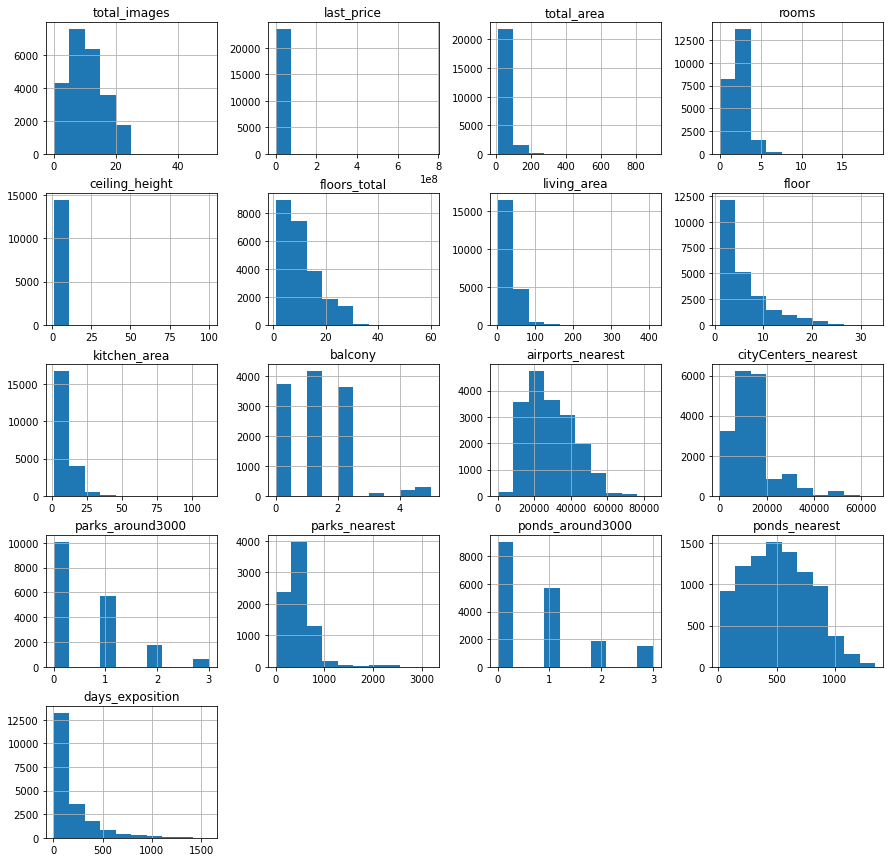

In [4]:
df.hist(figsize=(15, 15))
plt.show()

*Изучим на количество пропусков*

In [5]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

*Посмотрим на  "тепловую карту" пропусков:*

In [6]:
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


*Наибольшее количество пропусков наблюдается данных добавленных пользователем, например в колонке булевого типа апартаменты (20924), высота потолков, площадь квартиры, наличие кухни, балконов. И не меньшее количество в картографических, таких как: растояние до ближайшего парка, аэропорта, число водоёмов.Надо эти пропуски тщательно изучить и постараться восстановить(заполнить) нужные.*

**Вывод:**

1. **ceiling_height** здесь надо заполнить пропущённые значения
2. **floors_total** тип float64, a речь идёт о количестве этажей, его надо перевести в тип int, и есть пропущенные значения
3.   **living_area** здесь надо заполнить пропущённые значения
4.   **kitchen_area** здесь надо заполнить пропущённые значения
5.   **balcony** тип float64 заменим на int, и заполним пропущенные значения 
6.   **locality_name** здесь надо заполнить или удалить пропущённые значения 
7.   **parks_around3000** тип float64, речь идёт о количестве парков, его надо перевести в тип int, и есть пропущенные значения
8.  **ponds_around3000** тип float64, речь идёт о количестве водоёмов, его надо перевести в тип int, и есть пропущенные значения
9.  **first_day_exposition** тип float64, а нам надо заменить его на datetime
10.  **is_apartment** заменим пустые значения на False
11. **last_price** тип float64 заменим на тип int
12. **airports_nearest** данные в этом столбце надо привести к типу int, и заполнить нулевые значения
13. **days_exposition** эта колонка типа float64, заменим на целочисленный int ,так как речь идёт о днях

### Предобработка данных

*Выведем столбцы для удобства дальнейшей работы с данными*

In [7]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

*Название столбца cityCenters_nearest нужно привести к нижнему регистру*

In [8]:
df.rename(columns = {'cityCenters_nearest': 'citycenters_nearest'}, inplace = True)

In [9]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'citycenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

*Проверим датафрейм на наличие дубликатов в данных*

In [10]:
df.duplicated().sum()

0

*Дубликатов не оказалось, значит работаем со столбцами по порядку, изучим на наличие информации и ошибок в них.
Посмотрим на столбец:*

**2.1. ceiling_height — высота потолков (м):**

In [11]:
df['ceiling_height'].isna().sum()

9195

In [12]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

*В колонке указана высота потолков, не может быть 25, 32 и выше, поэтому логично предположить, что были допущены ошибки, заменим значения*

In [13]:
df[df['ceiling_height']>15]['ceiling_height'].unique()

array([ 25. ,  32. ,  27. ,  24. ,  26. ,  20. ,  22.6,  27.5, 100. ])

In [14]:
df['ceiling_height'] = df['ceiling_height'].replace({25.000: 2.5, 32.000: 3.2, 27.000:2.7,24.000:2.4,26.000: 2.6,20.000: 2.0,22.600:2.26,27.500:2.75,100.000:10.0})

<AxesSubplot:ylabel='Frequency'>

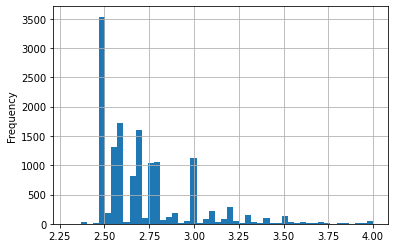

In [15]:
df['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 50, range=(2.3,4), grid = True)

In [16]:
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace = True)

In [17]:
df['ceiling_height'].isna().sum()

0

*Мы сначало вывели количество пропусков в столбце, их у нас было 9195, затем вывели описательную статистику по данному столбцу. В основном значения расположены в диапазоне от 2,5 до 2,8 поэтому было принять решение заполнить пропущенные значения медианным. И после данных изменений проверили на наличие пустых значений, их не осталось*

**2.2. floors_total — всего этажей в доме:**

In [18]:
df['floors_total'].isna().sum()

86

In [19]:
round(df['floors_total'].describe())

count    23613.0
mean        11.0
std          7.0
min          1.0
25%          5.0
50%          9.0
75%         16.0
max         60.0
Name: floors_total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

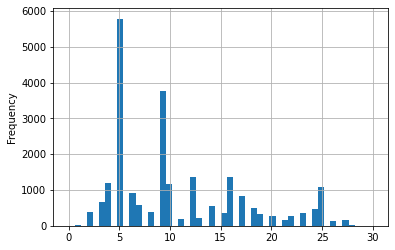

In [20]:
df['floors_total'].sort_values().plot(y = 'floors_total', kind = 'hist', bins = 50, range=(0,30), grid = True)

In [21]:
print('Процент пропущенных значений в колонке с количеством этажей:', round(df['floors_total'].isnull().sum() * 100 / len(df), 1),'%')

Процент пропущенных значений в колонке с количеством этажей: 0.4 %


In [22]:
df.dropna(subset=['floors_total'], inplace = True)

In [23]:
df['floors_total'].isna().sum()

0

In [24]:
df['floors_total'] = df['floors_total'].astype('int')

<div class="alert alert-info"> 
<b>Вывод:</b> 
    В колонке с количеством этажей есть пропущенные значения, их не так много, всего 86, что составляет менее одного процента от общего количества строк в данных (0,4%), поэтому было принято решение их удалить. Возможно пропуски могли возникнуть в результате не заполнения всех полей в объявлении, так как большинство объявлений заполняются в будние дни, или это одноэтажное здание, например барачного типа, где только однин этаж, и люди считают не целесообразным это указавать, мы можем только предполагать, так как не знаем истинных причин пропусков в данных.
</div>

**2.3. living_area — жилая площадь в квадратных метрах (м²)**

**2.4. kitchen_area — площадь кухни в квадратных метрах (м²)**

In [25]:
print(df['living_area'].isna().sum())
df['kitchen_area'].isna().sum()

1870


2231

In [26]:
print(df['living_area'].isna().sum())
df['kitchen_area'].isna().sum()

1870


2231

In [27]:
print('Процент пропущенных значений cтолбца с жилой площадью:', round(df['living_area'].isnull().sum() * 100 / len(df), 1),'%')

Процент пропущенных значений cтолбца с жилой площадью: 7.9 %


In [28]:
print('Процент пропущенных значений столбца с площадью кухни:', round(df['kitchen_area'].isnull().sum() * 100 / len(df), 1),'%')

Процент пропущенных значений столбца с площадью кухни: 9.4 %


<div class="alert alert-info"> 
<b>Вывод:</b> 
    Процент пропущенных значений в столбцах с жилой площадью и площадью кухни превышает допустимый (5%), мы их оставим такими, какие они есть. Но есть мысли по восстановлению таких значений, например, отобрать квартиры с количеством комнат больше двух, так как эти квартиры уже не будут являться студиями, и в них предполагается наличие кухни, либо  у нас есть столбец 'studio' в котором нет пропусков, и его можно применять при отбросе студий-квартир. К  студиям также можно применить данный фильтр и посмотреть в них пропуски.  Жилую же площадь можно было бы расчитать путём деления квартир на группы, исходя из их общей площади и затем заменить процентным соотношением по каждой группе в отдельности, и постараться восстановить данные на сколько это возможно.
</div>

**2.5. balcony — число балконов:**

In [29]:
df['balcony'] = df['balcony'].fillna(0).astype('int')

*Количество балконов привели к типу int предварительно заменив все пустые значения на 0.*

**2.6. locality_name — название населённого пункта:**

In [30]:
df['locality_name'].isna().sum()

48

*Для начала удалим те квартиры, в которых не указан адрес. так как мы в дальнейшем не сможем с ними работать*

In [31]:
df.dropna(subset=['locality_name'], inplace=True)

In [32]:
df['locality_name'].value_counts()

Санкт-Петербург      15651
посёлок Мурино         520
посёлок Шушары         439
Всеволожск             398
Пушкин                 369
                     ...  
деревня Пижма            1
деревня Лупполово        1
деревня Шпаньково        1
деревня Тихковицы        1
деревня Пельгора         1
Name: locality_name, Length: 364, dtype: int64

In [33]:
df['locality_name'] = df['locality_name'].str.replace("посёлок", "поселок")

In [34]:
df['locality_name'].isna().sum()

0

*В этом столбце мы удалили квартиры без адресов, и заменили значение посёлок на правильное*

**2.7. parks_around3000 — число парков в радиусе 3 км:**

In [35]:
df['parks_around3000'].isna().sum()

5500

In [36]:
df['parks_around3000'] = df['parks_around3000'].fillna(value=0).astype(int)

In [37]:
df['parks_around3000'].isna().sum()

0

*Число парков привели к типу int предварительно заменив все пустые значения на 0*

**2.8. ponds_around3000 — число водоёмов в радиусе 3 км:**

In [38]:
df['ponds_around3000'].isna().sum()

5500

In [39]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(value=0).astype(int)

In [40]:
df['ponds_around3000'].isna().sum()

0

*Число водоёмов привели к типу int предварительно заменив все пустые значения на 0*

**2.9. first_day_exposition  — сколько дней было размещено объявление (от публикации до снятия)**

In [41]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

*Привели столбец к формату дата*

**2.10. is_apartment — апартаменты (булев тип)**

In [42]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [43]:
df['is_apartment'].isna().sum()

20805

In [44]:
# Выясняем количество значений в аппартаментах. Всего аппартаменты - 50. Заменяем пропущенные значения на нет
df['is_apartment'] = df['is_apartment'].fillna(value = False)

*Заменили пропущенные значения на False*

**2.11. last_price — цена на момент снятия с публикации:**

In [45]:
df['last_price'] = df['last_price'].astype(int)

*В цене на момент снятия с публикации мы заменили тип float64 на int64, пропущенных значений не было, идём дальше*

**2.12. airports_nearest — расстояние до ближайшего аэропорта в метрах (м)**

In [46]:
print('Процент пропущенных значений столбца растояния до аэропорта:', round(df['airports_nearest'].isnull().sum() * 100 / len(df), 1),'%')

Процент пропущенных значений столбца растояния до аэропорта: 23.4 %


*Слишком много пропущенных значений, думаю логично заполнить по совпадению населённых пунктов*

<AxesSubplot:>

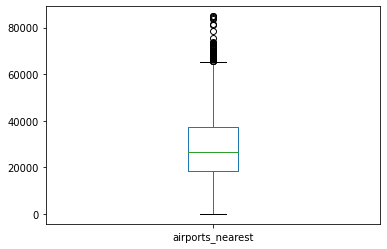

In [47]:
df['airports_nearest'].plot(kind='box')

*Выбросы есть, но они не сильно разбросаны, оставим их так как есть. Но присутствуют нулевые значения, квартира не может располагаться в самом аэропорту, просто скорее всего этот момент не посчитали нужным заполнить, либо просто пропустили. Давайте посмотрим на эти квартиры, в которых есть нулевые значения*

In [48]:
df[df['airports_nearest']==0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000,34.7,2018-09-23,1,2.7,9,19.8,3,False,...,6.0,2,Санкт-Петербург,0.0,22801.0,0,NaN,0,NaN,60.0


*У нас только одна квартира, с таким показателем, которая находится в Санкт-Петербурге, заменим медианное значение квартир, находящихся именно в Санкт-Петербурге*

In [49]:
df[df['locality_name'] == 'Санкт-Петербург']['airports_nearest'].median()

26763.0

In [50]:
df.loc[21085, 'airports_nearest'] = df[df['locality_name'] == 'Санкт-Петербург']['airports_nearest'].median()
df.loc[21085]

total_images                              0
last_price                          7000000
total_area                             34.7
first_day_exposition    2018-09-23 00:00:00
rooms                                     1
ceiling_height                          2.7
floors_total                              9
living_area                            19.8
floor                                     3
is_apartment                          False
studio                                False
open_plan                             False
kitchen_area                            6.0
balcony                                   2
locality_name               Санкт-Петербург
airports_nearest                    26763.0
citycenters_nearest                 22801.0
parks_around3000                          0
parks_nearest                           NaN
ponds_around3000                          0
ponds_nearest                           NaN
days_exposition                        60.0
Name: 21085, dtype: object

*Пропуски заполним медианами значений airports_nearest по совпадению в locality_name*

In [51]:
locality_median = df.groupby('locality_name')['airports_nearest'].median().sort_values()
locality_median = locality_median.dropna()
display(locality_median.head(10))

locality_name
поселок Александровская    12896.5
Пушкин                     15766.0
поселок Шушары             17427.0
Павловск                   20529.5
поселок Петро-Славянка     20605.0
Красное Село               25723.5
поселок Металлострой       25758.0
Колпино                    26232.0
поселок Усть-Ижора         26510.5
Санкт-Петербург            26763.0
Name: airports_nearest, dtype: float64

*Напишем функцию для присваивания пропущённому значению значение медианы*

In [52]:
def median_loc(row):
    if row not in locality_median:
        return np.nan
    return locality_median[row]

In [53]:
print('Проверка:', median_loc('Санкт-Петербург'))

Проверка: 26763.0


In [54]:
df['airports_nearest'].isna().sum()

5524

In [55]:
df.loc[(df['locality_name']=='Санкт-Петербург') & (df['airports_nearest'].isna()==True)].index

Int64Index([   81,   593,   604,   733,   742,   795,   974,  1336,  1872,
             1895,  2364,  2415,  2707,  2882,  3200,  3501,  4323,  4781,
             5216,  5444,  5908,  7272,  7521,  7542,  7592,  8018,  8628,
             9054,  9435,  9880, 10220, 10669, 10684, 10879, 11132, 11193,
            11446, 11457, 11796, 11801, 11872, 12401, 12446, 13106, 13470,
            14276, 14682, 14944, 14969, 15161, 15919, 16218, 16247, 16470,
            16580, 16825, 16927, 17757, 17791, 18222, 18292, 18315, 18557,
            18651, 19084, 19130, 19148, 19233, 19267, 19861, 19870, 19998,
            20104, 20977, 21075, 21399, 21668, 21769, 21881, 21955, 22554,
            22628, 22790, 23124],
           dtype='int64')

In [56]:
df.loc[df['airports_nearest'].isna()==True, 'airports_nearest'] = df['locality_name'].apply(median_loc)

In [57]:
df.loc[23124]

total_images                              0
last_price                          3500000
total_area                             41.3
first_day_exposition    2018-01-11 00:00:00
rooms                                     3
ceiling_height                         2.55
floors_total                              5
living_area                            29.5
floor                                     1
is_apartment                          False
studio                                False
open_plan                             False
kitchen_area                            6.0
balcony                                   0
locality_name               Санкт-Петербург
airports_nearest                    26763.0
citycenters_nearest                 11246.0
parks_around3000                          0
parks_nearest                           NaN
ponds_around3000                          0
ponds_nearest                           NaN
days_exposition                        23.0
Name: 23124, dtype: object

In [58]:
df['airports_nearest'].isna().sum()

5432

<div class="alert alert-info"> 
<b>Вывод:</b> 
    Рассчитав процент пропусков в данных с расстоянием до аэропорта, мы пришли к вывод что пропусков более 20%, мы посмотрели на распределение расстояния, на выбросы, и приняли решение попробовать заполнить эти пропуски медианным, предварительно сгруппировав квартиры по населённым пунктам. Данным способом нам удалось заполнить лишь 92 значения.
    Пропуски в данных могут быть вызваны тем, что люди просто не пользуются авиаперевозками, и данный параметр для них не является преимущественным при размещении объявления. Либо эти параметры просто были пропущены, из-за описания информации в самом объявлении.
</div>

**2.13. days_exposition — сколько дней было размещено объявление (от публикации до снятия)**

In [59]:
df['days_exposition'] = df['days_exposition'].fillna(0)

In [60]:
df['days_exposition'] = df['days_exposition'].astype('int')

<div class="alert alert-info"> 
<b>Вывод по предобработке данных</b> 
    
<b>   </b>
    Всего у нас 23699 записи. Многих столбцов есть пропущенные значения и некорректный тип данных, который мы исправили. По ряду признаков есть аномальные значения, это как нулевые, так и завышенные значения.
    Где было возможно заменить значения, мы заменили, либо на ноль, либо на медианное значение. В столбце с этажами их было менее одного процента, мы их удалили. Отдельное внимание следует обратить на пропущенные значения в таких данных как жилая площадь, площадь кухни. В некоторых столбцах большой процент пропусков который мы не смогли восстановить, причинами могут быть как фактор человеческий(посчитали не важным, указали в другом месте, например всё указано в общем описании квартиры, может просто забыли), так и технические причины связанные с сменой формата данных, перенос с одного источника на другой, разная программа конвертирования данных. Но просмотрев и изучив данные мы всё же больше склоняемся над тем, что пропуски связаны с ошибочным, или не правильным оформлением объявления человеком (не возраста людей хорошо разбираются в компьютерах, некоторые могут только описать квартиру и грубо говоря поставить цену), можно и обратиться к сотрудникам, которые эту информацию предоставили, для уточнения информации, либо чтобы они нашли первоисточник, если это возможно.

</div>

### Посчитайте и добавьте в таблицу новые столбцы

*Давайте добавим новый столбец в таблицу с ценой одного квадратного метра за квартиру и сразу цену приведём к целочисленному типу int:*

In [61]:
df['price_m2'] = (df['last_price'] / df['total_area']).astype('int')

*Добавим день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)*

In [62]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['weekday'].unique()

array([3, 1, 4, 0, 2, 6, 5])

*Добавим столбец с месяцем публикации объявления:*

In [63]:
df['month'] = df['first_day_exposition'].dt.month
df['month'].unique()

array([ 3, 12,  8,  7,  6,  9, 11,  4,  5,  2,  1, 10])

*С годом публикации объявления:*

In [64]:
df['year'] = df['first_day_exposition'].dt.year
df['year'].unique()


array([2019, 2018, 2015, 2017, 2016, 2014])

*Создадим новую колонку, куда запишем тип этажа квартиры (значения — «‎первый», «последний», «другой»):*

In [65]:
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_category'] = df.apply(floor_group, axis=1)
df['floor_category'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

*Рассчитаем расстояние до центра города в километрах (переведите из м в км и округлите до целых значений), и запишем изменения в этот же столбец*

In [66]:
df['citycenters_nearest'] = df['citycenters_nearest'].fillna(999999)

In [67]:
df['citycenters_nearest'] = df['citycenters_nearest'].apply(lambda x: x/1000)

### Проведите исследовательский анализ данных

**Изучим данные с общей площадью**

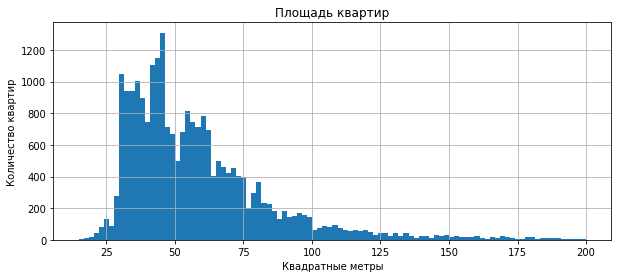

In [68]:
df['total_area'].plot(bins = 100, kind = 'hist', range = (15, 200), figsize = (10, 4), title = 'Площадь квартир', grid = True)
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

In [69]:
df['total_area'].value_counts().head(5)

45.0    419
42.0    383
31.0    346
60.0    346
44.0    343
Name: total_area, dtype: int64

In [70]:
df['total_area'].sort_values(ascending = False).head(5)

19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
Name: total_area, dtype: float64

In [71]:
round(df['total_area'].describe())

count    23565.0
mean        60.0
std         36.0
min         12.0
25%         40.0
50%         52.0
75%         70.0
max        900.0
Name: total_area, dtype: float64

**Вывод: посмотрев на площадь квартир графически и рассчитав необходимые показатели мы видим, что наиболее часто продаются квартиры с площадью  в диапазоне от 31 до 60 квадратных метров, есть выбросы, которые мы не включили в график, это квартиры с площадью более 500 квадратов, мы их оставим, так как при расчёты показателей описательной статистики они не сильно повлияли на медиану и процентили.**

**Изучим  жилую площадь квартир**

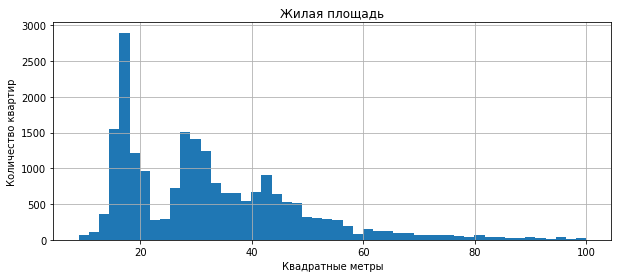

In [72]:
df['living_area'].plot(bins = 50, kind = 'hist', range = (9, 100), figsize = (10, 4), title = 'Жилая площадь', grid = True)
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

In [73]:
df['living_area'].value_counts().head(10)

18.0    882
17.0    673
30.0    598
16.0    483
20.0    479
28.0    422
31.0    379
19.0    327
32.0    317
29.0    317
Name: living_area, dtype: int64

In [74]:
round(df['living_area'].sort_values(ascending = False).head(5))

19540    410.0
5358     409.0
12401    348.0
4237     332.0
12859    322.0
Name: living_area, dtype: float64

In [75]:
round(df['living_area'].describe())

count    21700.0
mean        34.0
std         22.0
min          2.0
25%         19.0
50%         30.0
75%         42.0
max        410.0
Name: living_area, dtype: float64

<div class="alert alert-info"> 
<b>Вывод:</b> 
Наибольшее количество продаваемых квартир имеют жилую площадь в диапазоне от 16 до 50 квадратных метров, встречаются квартиры с жилой площадью более 300 квадратных метров, но на медианное значение эти квартиры не оказывают существенное значения, поэтому не будем удалять эти выбросы, оставим так как есть.

</div>

**Изучим площадь кухни:**

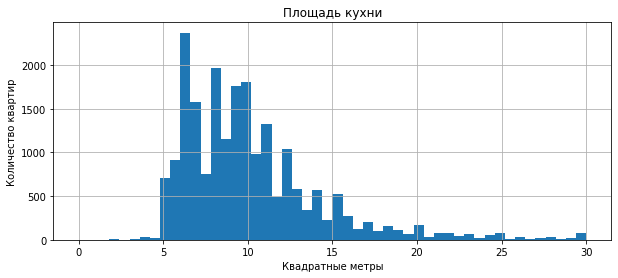

In [76]:
df['kitchen_area'].plot(bins = 50, kind = 'hist', range = (0, 30), figsize = (10, 4), title = 'Площадь кухни', grid = True)
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

In [77]:
df['kitchen_area'].value_counts().head(5)

6.0     1298
10.0    1259
8.0     1108
9.0     1099
7.0     1062
Name: kitchen_area, dtype: int64

In [78]:
df['kitchen_area'].sort_values(ascending = False).head(5)

19540    112.0
20215    107.0
2489     100.7
5358     100.0
16239     93.2
Name: kitchen_area, dtype: float64

In [79]:
round(df['kitchen_area'].describe())

count    21343.0
mean        11.0
std          6.0
min          1.0
25%          7.0
50%          9.0
75%         12.0
max        112.0
Name: kitchen_area, dtype: float64

**Вывод: наиболее распространены квартиры с площадью кухни не более 10 квадратных метров, но есть и такие в которых площадь превышает 100 квадратов, эти выбросы также трогать не будем, так как они не сильно влияют на описательную статистику.** 

**Изучим цену объекта:**

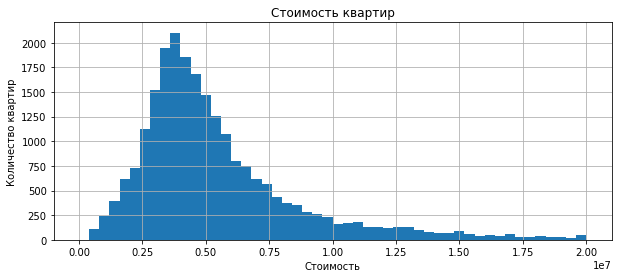

In [80]:
df['last_price'].plot(bins = 50, kind = 'hist', range = (0, 20000000), figsize = (10, 4), title = 'Стоимость квартир', grid = True)
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()

In [81]:
df['last_price'].value_counts().head(5)

4500000    341
3500000    289
4000000    260
4300000    260
4200000    258
Name: last_price, dtype: int64

In [82]:
df['last_price'].sort_values(ascending = False).head(5)

12971    763000000
19540    420000000
14706    401300000
1436     330000000
15651    300000000
Name: last_price, dtype: int64

In [83]:
round(df['last_price'].describe())

count        23565.0
mean       6540058.0
std       10910935.0
min          12190.0
25%        3400000.0
50%        4646000.0
75%        6790000.0
max      763000000.0
Name: last_price, dtype: float64

**Вывод: наибольшее количество квартир имеют стоимость 3,5 - 4,5 млн.руб.. Встречаются квартиры со стоимостью свыше 300 млн.руб., при расчёте описательной статистики мы посмотрели на показатели, и эти выбросы не повлияли на расчет медианы и процентилей удалять выбросы не будем.**

<div class="alert alert-info"> 
<b>Вывод:</b> 
    В колонке с ценой квартиры минимальное значение равно 12190 рублей. Данные надо проверять, возможно в них допушена ошибка с переводом из тысяч рублей в рубли. Также можно предположить, что продавец квартиры мог разместить квартиру сдаваемую в аренду не в том разделе, но мы не станем убирать эти выбивающиеся значения (на будущее всё таки стоит спросить об этой квартире и в целом о неадекватных значениях у сотрудников, предоставивших данные)
    
</div>

**Изучим данные с количеством комнат:**

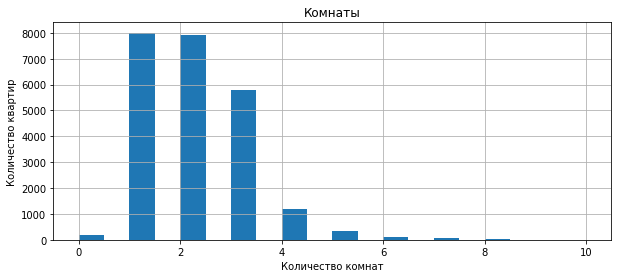

In [84]:
df['rooms'].plot(bins = 20, kind = 'hist', range = (0, 10), figsize = (10, 4), title = 'Комнаты', grid = True)
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

In [85]:
df['rooms'].value_counts().head(5)

1    8004
2    7897
3    5779
4    1172
5     325
Name: rooms, dtype: int64

In [86]:
df['rooms'].sort_values(ascending=False).head(10)

14498    19
18848    16
5358     15
20829    14
866      14
19540    12
648      11
9688     11
18891    10
18119    10
Name: rooms, dtype: int64

**Вывод: наибольшее количество продаваемых квартир имеют одну, две или три комнаты, реже встречаются четыре и пять. Также в датафрейме есть квартиры с 19-тью комнатами, ничего удалять не будем, оставим эти данными такими.**

**Посмотрим на высоту потолков:**

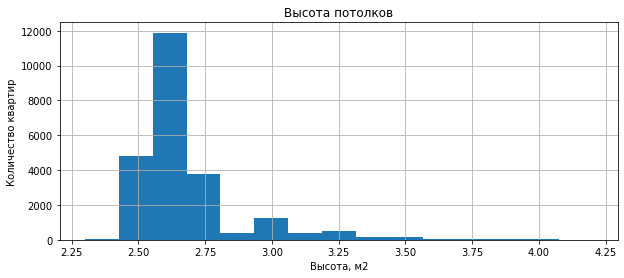

In [87]:
df['ceiling_height'].plot(bins = 15, kind = 'hist', range = (2.3,4.2), figsize = (10, 4), title = 'Высота потолков', grid = True)
plt.xlabel('Высота, м2')
plt.ylabel('Количество квартир')
plt.show()

In [88]:
df['ceiling_height'].value_counts().head(5)

2.65    9758
2.50    3522
2.60    1646
2.70    1579
3.00    1108
Name: ceiling_height, dtype: int64

In [89]:
df['ceiling_height'].sort_values(ascending = False).head(5)

15061    14.0
22309    10.3
22869    10.0
5863      8.3
17442     8.0
Name: ceiling_height, dtype: float64

In [90]:
round(df['ceiling_height'].describe(),2)

count    23565.00
mean         2.70
std          0.25
min          1.00
25%          2.60
50%          2.65
75%          2.70
max         14.00
Name: ceiling_height, dtype: float64

**Вывод: по графику видно, что в основном в квартирах указана высота потолков с 2,5 - 3,0 метров, есть и выбросы с показателем в 14, 10, 8 метров.** 

**Изучим этаж квартиры**

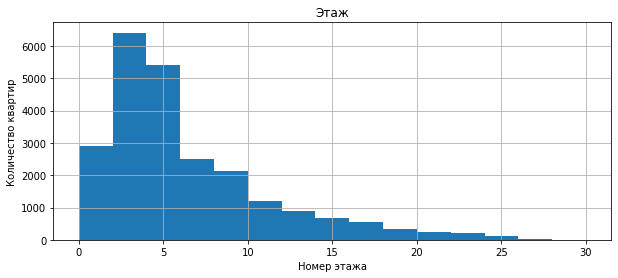

In [91]:
df['floor'].plot(bins = 15, kind = 'hist', range = (0,30), figsize = (10, 4), title = 'Этаж', grid = True)
plt.xlabel('Номер этажа')
plt.ylabel('Количество квартир')
plt.show()

In [92]:
df['floor'].value_counts().head(5)

2    3351
3    3061
1    2909
4    2793
5    2612
Name: floor, dtype: int64

In [93]:
df['floor'].sort_values(ascending = False).head(5)

18218    33
11575    32
18629    31
1917     30
11079    29
Name: floor, dtype: int64

In [94]:
round(df['floor'].describe())

count    23565.0
mean         6.0
std          5.0
min          1.0
25%          2.0
50%          4.0
75%          8.0
max         33.0
Name: floor, dtype: float64

**Наибольшее количество квартир находятся до пятого этажа, чаще всего это квартиры на четвертом этаже, и есть квартиры в высотных домах с этажом выше 30-го.**


**Посмотрим на тип этажа квартиры («первый», «последний», «другой»):**

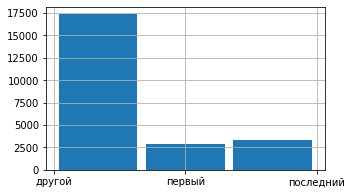

In [95]:
df['floor_category'].hist(figsize= (5,3), bins=3, rwidth= .9)
plt.show()

In [96]:
df['floor_category'].value_counts().head(5)

другой       17326
последний     3330
первый        2909
Name: floor_category, dtype: int64

**Вывод: Продаваемые квартиры в основном находятся не на первом, и не на последнем этажах, а в середине дома.** 

**Посмотрим на общее количество этажей в доме:**

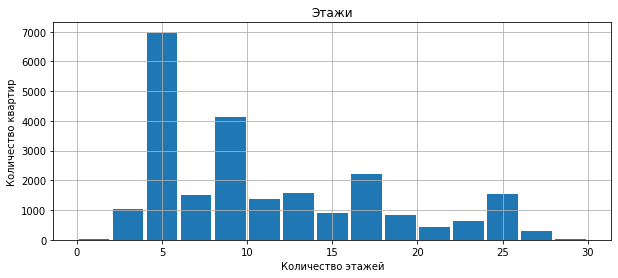

In [97]:
df['floors_total'].plot(bins = 15, kind = 'hist', range = (0,30), figsize = (10, 4), title = 'Этажи', grid = True,  rwidth= .9)
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()

In [98]:
df['floors_total'].value_counts().head(5)

5     5775
9     3758
16    1375
12    1361
4     1193
Name: floors_total, dtype: int64

In [99]:
df['floors_total'].sort_values(ascending = False).head(5)

2253     60
16731    52
16934    37
5807     36
11079    36
Name: floors_total, dtype: int64

**Вывод: преобладают в основном пятиэтажные, и девятиэтажные дома, также есть дома с этажами выше тридцатого.**

**Изучим расстояние до центра города в метрах:**

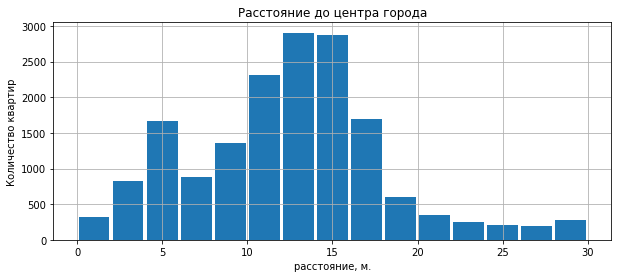

In [100]:
df['citycenters_nearest'].plot(bins = 15, kind = 'hist', range = (0,30), figsize = (10, 4), title = 'Расстояние до центра города', grid = True,  rwidth= .9)
plt.xlabel('расстояние, м.')
plt.ylabel('Количество квартир')
plt.show()

In [101]:
round(df['floors_total'].describe())

count    23565.0
mean        11.0
std          7.0
min          1.0
25%          5.0
50%          9.0
75%         16.0
max         60.0
Name: floors_total, dtype: float64

**Вывод: Квартиры в основном находятся не далеко от центра города, наибольшее количество расположено в 9 километрах от центра, есть квартиры и с более дальним расстоянием в 60 километров от центра**

**Посмотрим на расстояние до ближайшего аэропорта**

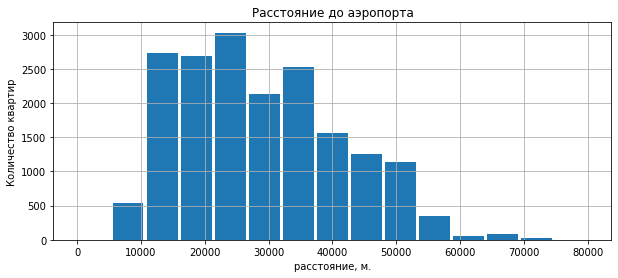

In [102]:
df['airports_nearest'].plot(bins = 15, kind = 'hist', range = (0,80000), figsize = (10, 4), title = 'Расстояние до аэропорта', grid = True,  rwidth= .9)
plt.xlabel('расстояние, м.')
plt.ylabel('Количество квартир')
plt.show()

In [103]:
df['airports_nearest'].value_counts().head(5)

26763.0    86
37434.0    61
21928.0    32
44870.0    30
39946.0    30
Name: airports_nearest, dtype: int64

In [104]:
round(df['airports_nearest'].describe())

count    18133.0
mean     28790.0
std      12604.0
min       6450.0
25%      18591.0
50%      26763.0
75%      37227.0
max      84869.0
Name: airports_nearest, dtype: float64

**Вывод: самое минимальное расстояние составило 0 метров, скорее всего тут были допущены ошибки, первый процентиль составил 21 км, а медианное значение равно 27 км.**

**Изучим данные с расстоянием до ближайшего парка:**

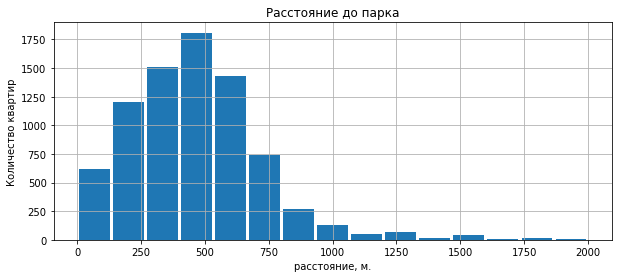

In [105]:
df['parks_nearest'].plot(bins = 15, kind = 'hist', range = (0,2000), figsize = (10, 4), title = 'Расстояние до парка', grid = True,  rwidth= .9)
plt.xlabel('расстояние, м.')
plt.ylabel('Количество квартир')
plt.show()

In [106]:
df['parks_nearest'].value_counts().head(5)

441.0    67
392.0    41
173.0    41
456.0    40
471.0    31
Name: parks_nearest, dtype: int64

In [107]:
round(df['parks_nearest'].describe())

count    8030.0
mean      491.0
std       342.0
min         1.0
25%       288.0
50%       455.0
75%       612.0
max      3190.0
Name: parks_nearest, dtype: float64

**Вывод: парки то квартир располагаются не на удалении, медианное значение составило 454 метра, и сортировка квартир это тоже подтверждает. Самое далёкое расположение парка составило  более трёх километров, но надо учесть что у нас очень много нулевых значений, поэтому точно сказать что эти показатели точные, нельзя.**

**Посмотрим на день и месяц публикации объявления.**

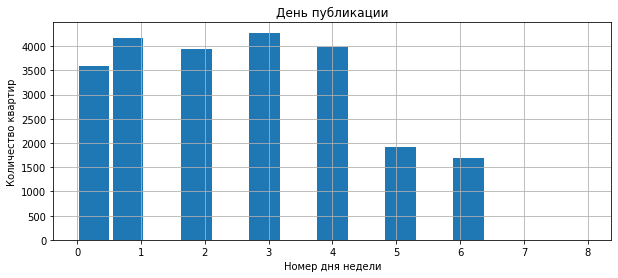

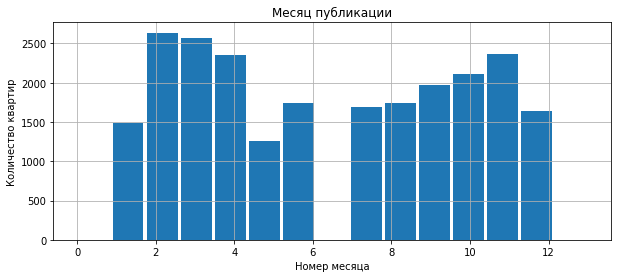

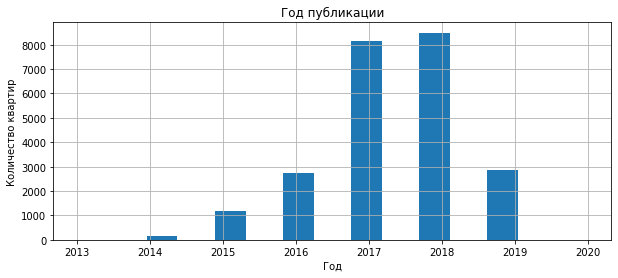

In [108]:
df['weekday'].plot(bins = 15, kind = 'hist', range = (0,8), figsize = (10, 4), title = 'День публикации', grid = True,  rwidth= .9)
plt.xlabel('Номер дня недели')
plt.ylabel('Количество квартир')
plt.show()

df['month'].plot(bins = 15, kind = 'hist', range = (0,13), figsize = (10, 4), title = 'Месяц публикации', grid = True,  rwidth= .9)
plt.xlabel('Номер месяца')
plt.ylabel('Количество квартир')
plt.show()

df['year'].plot(bins = 15, kind = 'hist', range = (2013, 2020), figsize = (10, 4), title = 'Год публикации', grid = True,  rwidth= .9)
plt.xlabel('Год')
plt.ylabel('Количество квартир')
plt.show()

In [109]:
round(df['weekday'].describe())

count    23565.0
mean         3.0
std          2.0
min          0.0
25%          1.0
50%          3.0
75%          4.0
max          6.0
Name: weekday, dtype: float64

In [110]:
df['month'].value_counts().head(5)

2     2636
3     2575
11    2360
4     2356
10    2108
Name: month, dtype: int64

In [111]:
df['year'].value_counts().head(5)

2018    8486
2017    8161
2019    2871
2016    2745
2015    1166
Name: year, dtype: int64

**Вывод: Публикация квартир преобладает в 2018 году, будние дни люди предпочитают больше, в выходные опубликовано наименьшее количество квартир. Значимых отличий в месяце публикации не наблюдается, но лидируют зимние месяцы.**

**Изучим, как быстро продавались квартиры:**

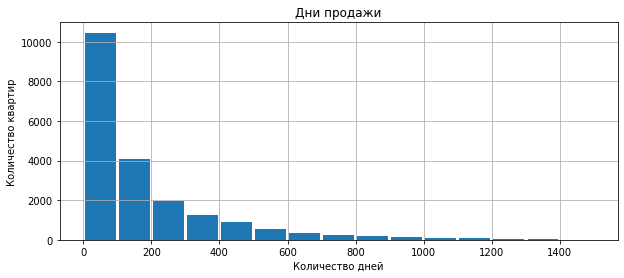

In [112]:
df[df['days_exposition'] !=0]['days_exposition'].plot(bins = 15, kind = 'hist', range = (0, 1500), figsize = (10, 4), title = 'Дни продажи', grid = True,  rwidth= .9)
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()

(1.0, 1000.0)

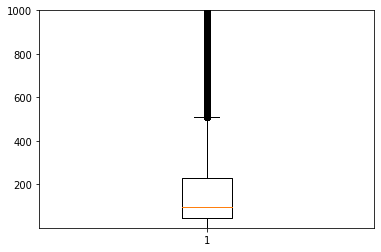

In [113]:
plt.boxplot(df[df['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)

In [114]:
df[df['days_exposition']!=0]['days_exposition'].value_counts().head(5)

45    879
60    538
7     234
30    208
90    200
Name: days_exposition, dtype: int64

In [115]:
df[df['days_exposition']!=0]['days_exposition'].sort_values(ascending = False).head(5)

18843    1580
1109     1572
9553     1553
1885     1513
20969    1512
Name: days_exposition, dtype: int64

In [116]:
round(df[df['days_exposition']!=0]['days_exposition'].describe())

count    20394.0
mean       181.0
std        220.0
min          1.0
25%         45.0
50%         95.0
75%        231.0
max       1580.0
Name: days_exposition, dtype: float64

**Вывод: Рассчитанное медианное время продажи составило 95 дней (большинство квартир продаётся быстро до 95 дней), а среднее время продажи - 181 день. Показатель высокий с длительностью продажи ниже уровня 95 дней. Стоит отметить, что есть много квартир, проданных за пару дней после публикации, и те, которые продавались больше 1500 дней.**

**Продажи можно считать быстрыми, продажа которых составляет 45 дней и меньше. Долгой продажей - 230 дней и выше.**

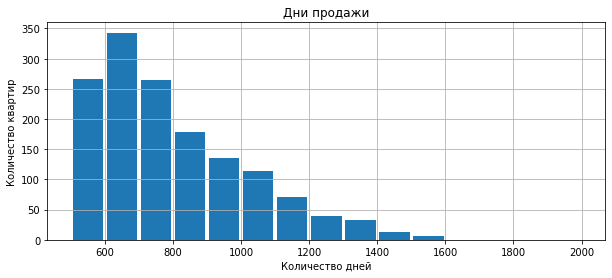

In [117]:
df[df['days_exposition'] >= 550]['days_exposition'].plot(bins = 15, kind = 'hist', range = (500, 2000), figsize = (10, 4), title = 'Дни продажи', grid = True,  rwidth= .9)
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()

Наткнулась в интернете на идею, что надо посмотреть на условия размещения объявлений на Яндекс Недвижимость, и нашла такую таблицу
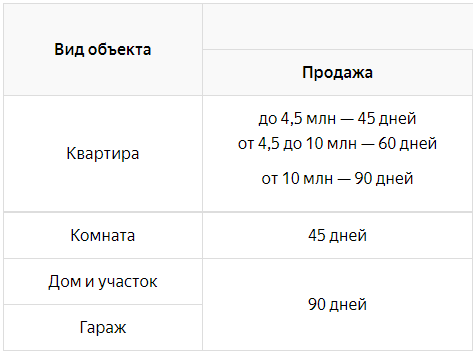

Надо пересмотреть наши данные с квартирами, и применить фильтрацию, именно по эти цифрам, немного сомнительно, что многие сроки продажи совпадают со временем публикации на сайте, просто объявление могло слетесь с публикации и засчитаться как проданная, и эти действия могут привести к ошибочным данным.


In [118]:
print('Количество квартир проданных в срок в 45 дней:', len(df[df['days_exposition']==45]))
print('Количество квартир проданных в срок в 60 дней:', len(df[df['days_exposition']==60]))
print('Количество квартир проданных в срок в 90 дней:', len(df[df['days_exposition']==90]))

Количество квартир проданных в срок в 45 дней: 879
Количество квартир проданных в срок в 60 дней: 538
Количество квартир проданных в срок в 90 дней: 200


Теперь надо определиться с очень длинным сроком размещения объявлений, по рассчитанным данным межквартильный размах в диапазоне 45 - 231 дней, и по построенному боксплоту видим, что усы упираются примерно в значение 500 дней. Поэтому целесообразно считать нормальным сроком размещения период  до 500 дней. Но удалить эти значения мы не можем, так как не уверены в них, и это удаление может исказить действительную картину продаж. Скорее всего надо обратиться к сотрудникам которые нам их предоставили и уточнить данные.

**Теперь посмотрим какие факторы больше всего влияют на общую (полную) стоимость объекта**

**Изучим, зависит ли цена от:**
1. общей площади;
2. жилой площади;
3. площади кухни;
4. количества комнат;
5. этажа, на котором расположена квартира (первый, последний, другой);
6. даты размещения (день недели, месяц, год).

**4.1. Зависимось цены и общей площади:**

Корреляция цены и общей площади равна: 0.6536213939252808


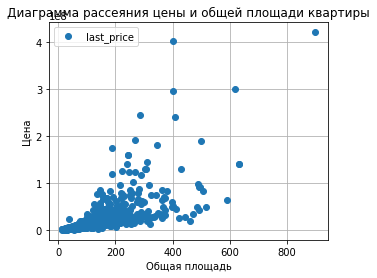

In [119]:
print('Корреляция цены и общей площади равна:', df['total_area'].corr(df['last_price']))
df.pivot_table(index = 'total_area', values = 'last_price').plot(style = 'o', grid = True, figsize = (5,4))
plt.title('Диаграмма рассеяния цены и общей площади квартиры',  fontsize = 12)
plt.xlabel('Общая площадь')
plt.ylabel('Цена')
plt.show()

**Вывод: зависимость между ценой и общей площадью квартиры составила 0,65, это значит, что связь этих параметров выше среднего, и с увеличением площади растёт стоимость квартиры, наблюдается положительная корреляция.**

**4.2. Зависимось цены и жилой площади:**

Корреляция цены и жилой площади равна: 0.5663795524388772


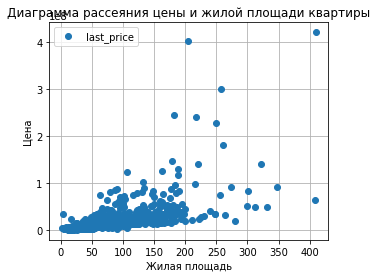

In [120]:
print('Корреляция цены и жилой площади равна:', df['last_price'].corr(df['living_area']))
df.pivot_table(index = 'living_area', values = 'last_price').plot(style = 'o', grid = True, figsize = (5,4))
plt.title('Диаграмма рассеяния цены и жилой площади квартиры',  fontsize = 12)
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.show()

**Вывод: рассчитанная корреляция показывает, что показатели связаны между собой, связь положительная выше среднего, с ростом жилой площади растёт общая стоимость квартиры, показатель составил 0,59.**

**4.3. Зависимось цены и площади кухни:**

Корреляция цены и площади кухни равна: 0.5203617949655245


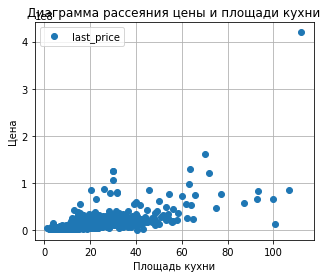

In [121]:
print('Корреляция цены и площади кухни равна:', df['last_price'].corr(df['kitchen_area']))
df.pivot_table(index = 'kitchen_area', values = 'last_price').plot(style = 'o', grid = True, figsize = (5,4))
plt.title('Диаграмма рассеяния цены и площади кухни',  fontsize = 12)
plt.xlabel('Площадь кухни')
plt.ylabel('Цена')
plt.show()

**Вывод: положительный коэффициент корреляции в 0,51 показывает на связь между ценой и площадью кухни, с ростом площади кухни будет увеличиваться цена за продаваемую квартиру, но  она не сильная, и утверждать что цена на прямую зависит от размера кухни мы не можем, надо смотреть на другие показатели.**

**4.4. Зависимось цены и количества комнат:**

            last_price     rooms
last_price    1.000000  0.618623
rooms         0.618623  1.000000


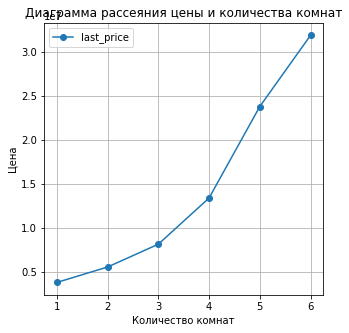

In [122]:
print(df.query('rooms > 0 and rooms < 7').pivot_table(index='floor', values=['rooms', 'last_price']).corr())
df.query('rooms > 0 and rooms < 7').pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Диаграмма рассеяния цены и количества комнат',  fontsize = 12)
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.show()

**Вывод: корреляция показывает положительную связь между ценой квартиры и количеством комнат, а значит что с увеличением количества комнат цена продаваемлй квартиры будет больше, что и логично, нам пришлось обрезать данные используя условие, если оставить данные так как есть, то в них есть выбросы в районе 12 этажа, тут надо либо просить уточнить информацию у сотрудников, либо смотреть на ошибки в них.**

**4.5. Зависимось цены и этажа, на котором расположена квартира (первый, последний, другой):**

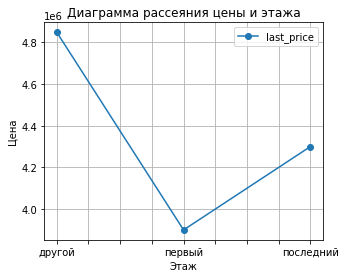

In [123]:
df.pivot_table(index = 'floor_category', values = 'last_price', aggfunc='median').plot(style = 'o-', grid = True, figsize = (5,4))
plt.title('Диаграмма рассеяния цены и этажа',  fontsize = 12)
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.show()

**Вывод: столбец с этажом у нас категориальная переменная, поэтому корреляцию мы не высчитывали. По графику можем сказать, что цена зависит от этажа, стоимость квартиры на первом этаже меньше, чем стоимость квартиры на последнем этаже, наиболее высокие цены наблюдаются на других этажах между первым и последним.**

**4.6. Зависимось цены и даты размещения (день недели, месяц, год):**

Корреляция цены и дня размещения равна: 0.0013569211122710747


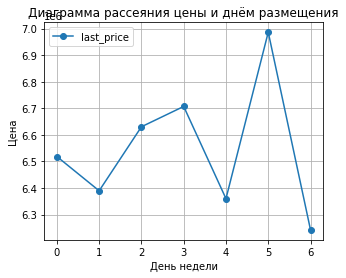

Корреляция цены и месяца размещения равна: 0.0027259571647347564


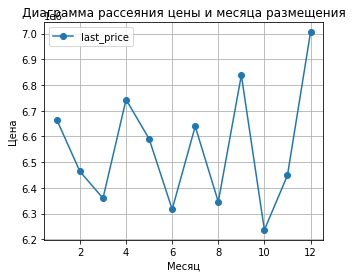

Корреляция цены и года размещения равна: -0.04286415271361107


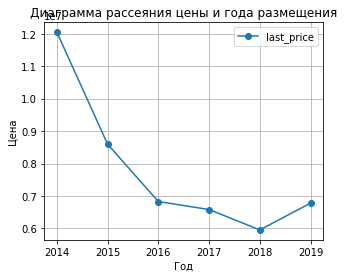

In [124]:
print('Корреляция цены и дня размещения равна:', df['last_price'].corr(df['weekday']))
df.pivot_table(index = 'weekday', values = 'last_price').plot(style = 'o-', grid = True, figsize = (5,4))
plt.title('Диаграмма рассеяния цены и днём размещения',  fontsize = 12)
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.show()

print('Корреляция цены и месяца размещения равна:', df['last_price'].corr(df['month']))
df.pivot_table(index = 'month', values = 'last_price').plot(style = 'o-', grid = True, figsize = (5,4))
plt.title('Диаграмма рассеяния цены и месяца размещения',  fontsize = 12)
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.show()

print('Корреляция цены и года размещения равна:', df['last_price'].corr(df['year']))
df.pivot_table(index = 'year', values = 'last_price').plot(style = 'o-', grid = True, figsize = (5,4))
plt.title('Диаграмма рассеяния цены и года размещения',  fontsize = 12)
plt.xlabel('Год')
plt.ylabel('Цена')
plt.show()

**Вывод: связи между ценой и датой публикации нет, показатели близки к нулю. Год публикации квартиры имееет тенденцию снижения вплоть до 2018 года, что, вероятно, вызвано кризисом 2014-2015 годов. В 2019 году цены снова стали повышаться, о чём свидетельствует рост курса доллара, увеличении цен на все строительные материалы и коммунальные услуги в стране. Это всего лишь предположение, график не информативный, необходимо иметь более свежую информацию**

<div class="alert alert-info"> 

<b>Рассмотрим динамику цены и площади продаваемых квартир</b> 

</div>

Text(0, 0.5, 'Цена')

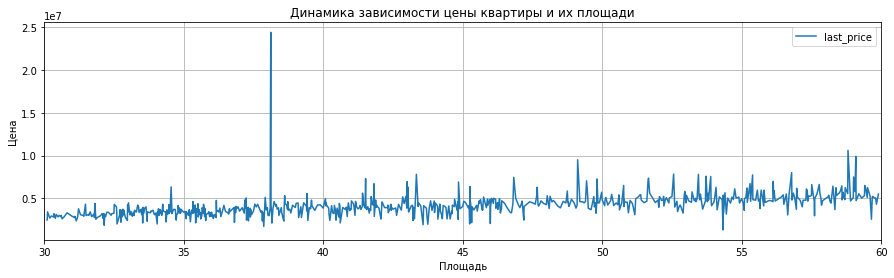

In [125]:
df.query('total_area > 30 and total_area < 60').pivot_table(index = 'total_area', values = 'last_price', aggfunc = 'mean').plot(xlim = (30, 60), grid=True, figsize = (15, 4), title = 'Динамика зависимости цены квартиры и их площади')
plt.xlabel('Площадь')
plt.ylabel('Цена')

**Чтобы посмотреть на то, зависит ли цена от площади продаваемой квартиры мы решили выбрать диапазон самых продаваемых квартир по площади, это были квартиры от 31 до 60 кв.м. На графике виден один выброс с площадью 38 кв.м., но всё равно заметна тенденция к увеличению стоимости за продаваемую квартиру.**

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

In [126]:
top_10 = df['locality_name'].value_counts().head(10)
pivot_top_10 = (df.query('locality_name in @top_10.index').pivot_table(index='locality_name', values='price_m2', aggfunc = ['count', 'mean'])).astype('int')
pivot_top_10.columns = ['count', 'mean']
pivot_top_10.sort_values(by = 'mean', ascending=False)

,count,mean
locality_name,,
Санкт-Петербург,15651,114868
Пушкин,369,103125
деревня Кудрово,299,92473
поселок Парголово,327,90175
поселок Мурино,552,85629
поселок Шушары,439,78550
Колпино,338,75424
Гатчина,307,68745
Всеволожск,398,68654


**Теперь выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра**

In [127]:
print('Населённый пункт с самой высокой стоимостью квадратного метра:')
display(pivot_top_10[pivot_top_10['mean'] == pivot_top_10['mean'].max()])
print('Населённый пункт с самой низкой стоимостью квадратного метра:')
pivot_top_10[pivot_top_10['mean'] == pivot_top_10['mean'].min()]

Населённый пункт с самой высокой стоимостью квадратного метра:


,count,mean
locality_name,,
Санкт-Петербург,15651,114868


Населённый пункт с самой низкой стоимостью квадратного метра:


,count,mean
locality_name,,
Выборг,237,58141


**Вывод: Наибольшая средняя стоимость квадратного метра продаваемой квартиры и количество продаваемых квартир в Санкт-Петербурге. Все остальные населённые пункты располагаются в Ленинградской области, не далеко от Санкт-Петербурга(кроме Выборга), у них хорошая инфрастурктура и из-за их располажения стоимость квадратного метра тоже высока. Из топ-10 наименьшее количество продаваемых квартир и наименьшая стоимость в небольшом по численности населения пункте Выборге, расположенном на большом расстоянии от Санкт-Петербурга.**

**Вычислим среднюю цену каждого километра**

,price_m2
citycenters_nearest,
0,187323
1,166603
2,146662
3,129526
4,137412
5,146977
6,152277
7,141399
8,120538


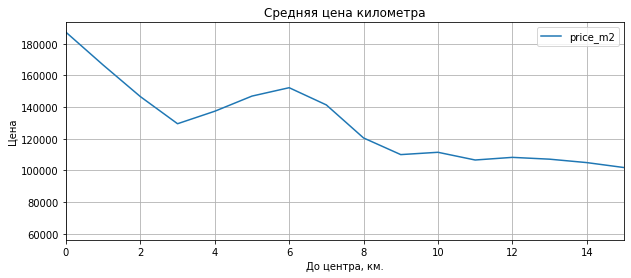

In [128]:
df['citycenters_nearest'] = df['citycenters_nearest'].astype('int')
pivot_table_km = df.query('locality_name == "Санкт-Петербург" and citycenters_nearest !=999').pivot_table(index = 'citycenters_nearest', values = 'price_m2', aggfunc = 'mean').astype('int')
pivot_table_km.plot(xlim = (0, 15), grid=True, figsize = (10, 4), title = 'Средняя цена километра')
plt.xlabel('До центра, км.')
plt.ylabel('Цена')
pivot_table_km

**Вывод: На графике видно, что снижение идет до трёх километров, затем снова подьём до 6 километров, выберем нижний пик равняясь на три километра и будем считать центральной зоной расстояние до 7 км, дальше средняя цена на квартиры имеет тенденцию к снижению.**

**Посмотрим сколько квартир в Санкт-Петербурге находятся в данном радиусе от центра**

In [129]:
len(df.query('locality_name == "Санкт-Петербург" and citycenters_nearest < 7'))

3298

**В Санкт-Петербурге 3305 таких квартир.**

### Общий вывод

**Мы работали с архивом объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.**

**Проведя исследовательский анализ можно сделать следующие выводы:**

**• наиболее часто продаются квартиры площадью от 31 до 60 квадратных метров;**

**• квартиры в большинстве имеет жилую площадь в диапазоне 16-20 квадратных метров;**

**• чаще распространены квартиры с площадью кухни не более 10 квадратных метров;**

**• большинство квартир имеют стоимость 3,5 - 4,5 млн.руб**

**• наибольшее количество продаваемых квартир имеют одну, две или три комнаты;**

**• в основном в квартирах указана высота потолков с 2,5 - 3,0 метров;**

**• продаваемые квартиры в основном находятся не на первом, и не на последнем этажах, а в середине дома;**

**• преобладают в основном пятиэтажные, и девятиэтажные дома;**

**• квартиры в основном находятся не далеко от центра города;**


**Факторы, влияющие на стоимость:**

**• общая площадь квартиры;**

**• жилая площадь;**

**• количество комнат.**

**На стоимость больше влияет площадь квартиры, чем число комнат, скорее всего это обьясняется тем, что комнат может быть меньше, но сами они большие по площади.**

**Цена зависит от этажа, стоимость квартиры на первом этаже меньше, чем стоимость квартиры на последнем этаже, наиболее высокие цены наблюдаются на других этажах между первым и последним.**

**Рассчитанное медианное время продажи составило 95 дней (большинство квартир продаётся быстро до 95 дней), а среднее время продажи - 181 день.** 

**Публикация квартир преобладает в 2018 году, будние дни люди предпочитают больше.**

**Стоимость квартиры также зависит от удалённости от центра города, например квадратный метр в Санкт-Петербурге - 114848, а в Выборге - 58141 (он наиболее удалён от центра города)**
